In [1]:
#importing requred libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud , STOPWORDS
from emoji import UNICODE_EMOJI_ENGLISH
from collections import Counter
from plotly.offline import iplot
import plotly.graph_objs as pgo
import plotly.express as px
import string
import os

In [2]:
#reading csv file
ytcommnets=pd.read_csv('UScomments.csv',error_bad_lines=False)

C:\Users\sandy4232\AppData\Local\Temp\ipykernel_9936\4118009510.py:2: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\sandy4232\AppData\Local\Temp\ipykernel_9936\4118009510.py:2: DtypeWarning:

Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
ytcommnets

video_id                                       comment_text likes  \
0       XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1       XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2       XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3       XpVt6Z1Gjjo                                MY FAN . attendance     3   
4       XpVt6Z1Gjjo                                         trending 😉     3   
...             ...                                                ...   ...   
691395  EoejGgUNmVU                                             Лучшая     1   
691396  EoejGgUNmVU  qu'est ce que j'aimerais que tu viennes à Roan...     0   
691397  EoejGgUNmVU                          Ven a mexico! 😍 te amo LP     0   
691398  EoejGgUNmVU                                    Islığı yeter...     0   
691399  EoejGgUNmVU  Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...     0   

       replies  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
691395       0  
691396       0  
691397       0  
691398       0  
691399       0  

[691400 rows x 4 columns]

In [4]:
#finding sum of the null values
ytcommnets.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [5]:
#removing null values from our dataframe
ytcommnets.dropna(inplace=True)

# Performing Sentiment Analysis

In [6]:
#collecting polarity of each comment in list
polarity=[]
for ytcommnet in ytcommnets['comment_text']:
    try:
        polarity.append(TextBlob(ytcommnet).sentiment.polarity)
    except:
        polarity.append(0)

In [7]:
#cheking output
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

In [8]:
#adding polarity column in df
ytcommnets['polarity']=polarity

In [9]:
#added polarity column
ytcommnets[50:100]

video_id                                       comment_text likes  \
50  XpVt6Z1Gjjo                    FUCK THIS DUDE AND HIS BROTHER.     0   
51  XpVt6Z1Gjjo  by the way why do you have a card board of the...     0   
52  XpVt6Z1Gjjo           Just a tad arrogant with the title, huh?     0   
53  XpVt6Z1Gjjo  Evan is just taking ur money for granted cause...     0   
54  XpVt6Z1Gjjo                   Omg he broke his play button box     0   
55  XpVt6Z1Gjjo     Get off of YouTube you spoiled Hollywood brat.     0   
56  XpVt6Z1Gjjo                Attack of titan squad were u at👻❤️😂     0   
57  XpVt6Z1Gjjo  Congrats Logan love u so much someday I would ...     0   
58  XpVt6Z1Gjjo  Um well not the best Vlog was expecting more b...     0   
59  XpVt6Z1Gjjo            Evan lowkey is starting to piss me off!     0   
60  XpVt6Z1Gjjo         tone it down fgt you didn't change youtube     0   
61  XpVt6Z1Gjjo  You all are worms. Congrats for being simple m...     0   
62  XpVt6Z1Gjjo  ░░░░░▐▀█▀▌░░░░▀█▄░░░\n░░░░░▐█▄█▌░░░░░░▀█▄░░\n░...     1   
63  XpVt6Z1Gjjo  No one fucking cares. You're a 12 year old. Th...     0   
64  XpVt6Z1Gjjo                                    yu are the best     1   
65  XpVt6Z1Gjjo                   Well done I LOVE! You so much :D     1   
66  XpVt6Z1Gjjo  I am very happy for this man and we need to sp...     1   
67  XpVt6Z1Gjjo  Me and my friends subscribe AAAAAAAAAAAA you g...     1   
68  XpVt6Z1Gjjo  I like you logan but your brother is a menace ...     1   
69  XpVt6Z1Gjjo  Hay login were is my March I bought it 3 month...     1   
70  XpVt6Z1Gjjo                     OMG u made this vid on my bday     2   
71  XpVt6Z1Gjjo                    I was the 50k sub and now this!     2   
72  XpVt6Z1Gjjo                       😂😂😂😂😭 I love Evan so much!!!     2   
73  XpVt6Z1Gjjo                                  it's everyday bro     0   
74  XpVt6Z1Gjjo                         DAFUQ did  i just watch ;)     0   
75  XpVt6Z1Gjjo                                    Jake Paul ? Who     0   
76  XpVt6Z1Gjjo                        Pls subscribe to my channel     0   
77  XpVt6Z1Gjjo                                   Logang gang gang     0   
78  XpVt6Z1Gjjo                         Whooooo.   Let's go Logang     0   
79  XpVt6Z1Gjjo                             1 on trending good job     0   
80  XpVt6Z1Gjjo                               365 days \n364 vlogs     1   
81  XpVt6Z1Gjjo                                                  M     0   
82  XpVt6Z1Gjjo                            My balls are itchy.....     0   
83  XpVt6Z1Gjjo                                      Sum ass Logan     0   
84  XpVt6Z1Gjjo                         what happen if Mavrick die     0   
85  XpVt6Z1Gjjo                                      This is shit.     0   
86  XpVt6Z1Gjjo                               1 on trending !!!!!!     1   
87  XpVt6Z1Gjjo                                        # be a gote     0   
88  XpVt6Z1Gjjo                                                 my     0   
89  XpVt6Z1Gjjo                            Tomorrow is my Birthday     2   
90  XpVt6Z1Gjjo                 #1 on trending....................     1   
91  XpVt6Z1Gjjo                          #1 on trending, FUCK YES!     2   
92  XpVt6Z1Gjjo                                           hi first     2   
93  XpVt6Z1Gjjo                          Woooooooooooooooow my boy     1   
94  XpVt6Z1Gjjo                                 Happy vlogiversary     2   
95  XpVt6Z1Gjjo                                #1 trending whoaaaa     1   
96  XpVt6Z1Gjjo                      MY BOIIII IS #1 TRENDING LMAO     2   
97  XpVt6Z1Gjjo                                  #1 on treading!!!     2   
98  XpVt6Z1Gjjo  *eyyyjooooo Good morning loooganng WHATS POPPP...     2   
99  XpVt6Z1Gjjo                        Good Job on trending Logan.     2   

   replies  polarity  
50       0 -0.400000  
51       0  0.800000  
52       0  0.000000  
53       0 -0.100000  
54       0  0.0

In [10]:
#seprating negative and positive comeents baised on polarity
ytcommnet_positive=ytcommnets[ytcommnets['polarity']==1]
ytcommnet_nigative=ytcommnets[ytcommnets['polarity']==-1]

In [11]:
ytcommnet_positive

video_id                                       comment_text likes  \
64      XpVt6Z1Gjjo                                    yu are the best     1   
156     cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227     WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307     sjlHnJvXdQs                                  This is priceless     0   
319     sjlHnJvXdQs                                Summed up perfectly     0   
...             ...                                                ...   ...   
691373  EoejGgUNmVU                             Perfect. Every version     0   
691383  EoejGgUNmVU                                  Me encantaaaaa <3     0   
691388  EoejGgUNmVU                                   Best song ever 🤘     0   
691389  EoejGgUNmVU                              excellent performance     0   
691393  EoejGgUNmVU                                                 <3     0   

       replies  polarity  
64           0       1.0  
156          0       1.0  
227          0       1.0  
307          0       1.0  
319          0       1.0  
...        ...       ...  
691373       0       1.0  
691383       0       1.0  
691388       0       1.0  
691389       0       1.0  
691393       0       1.0  

[19390 rows x 5 columns]

In [12]:
ytcommnet_nigative

video_id                                       comment_text likes  \
512     8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562     8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952     Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371    vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391    vu_9muoxT50                    cheeseus christ thats insane!!!     0   
...             ...                                                ...   ...   
690788  Hlt3rA-oDao                                Like Kelly she evil     0   
690865  Ni5Uc-DdMqk                     R U FUCKING KIDDING ME?!?!?!?!    11   
691073  4kmSATD25iY           This is horribly offensive please report     0   
691180  xlu6i6lT_vk  Sink holes looks terrifying sinkholes sink you...     0   
691224  qRoVlH1OcI4  Trump talked to the president of US Virgin Isl...     0   

       replies  polarity  
512          0      -1.0  
562          0      -1.0  
952          0      -1.0  
1371         0      -1.0  
1391         0      -1.0  
...        ...       ...  
690788       0      -1.0  
690865       1      -1.0  
691073       0      -1.0  
691180       0      -1.0  
691224       0      -1.0  

[3508 rows x 5 columns]

In [13]:
ytcommnet_nigative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [14]:
#join all comments
total_comments=' '.join(ytcommnet_nigative['comment_text'])

In [15]:
total_comments[0:1000]

"BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE HE EXPOSED HITLARY'S RITUAL ABUSE ON CHILDREN!!!!!!! Well… The brain surgeon Ben Carson just proved how truly insane he is… WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!! WTF BRUH!!!!!! cheeseus christ thats insane!!! this is the worst thing i've heard. ever. Economy is horrible in Cuba. It's going to be years before they get out of this. Sub to me if this is terrible PATHETIC I don't like this sportscaster  sounds very annoying commentators are awful This tv show became trump witch hunt tube... and frankly, boring. Arpaio should be arrested again for horribly butchering that song. This  show has become one-noted and pathetic. HARD CANDY!!!!!!!!!!! Tired of the philosophy add !!!!!!! boring 0:22   **laughs at terrible pun** Why is media even covering this disgusting woman anymore? How is this trending ? Awful a horrible attempt to try and get us to freak out this is one of the worst videos I've ever seen Whats with the horrible music? tf She 

In [16]:
total_comments_p=' '.join(ytcommnet_positive['comment_text'])

In [17]:
total_comments_p[1:100]

'u are the best Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as bes'

# Wordcloud representation of Sentiments

(-0.5, 399.5, 199.5, -0.5)

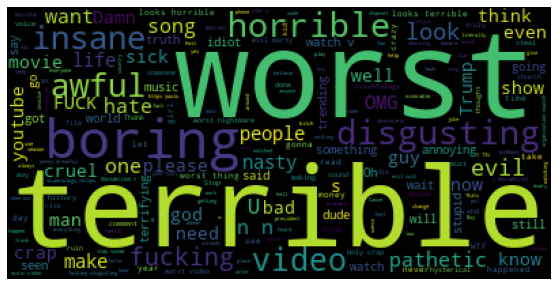

In [18]:
#fig for negative comments
wordcloud=WordCloud().generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

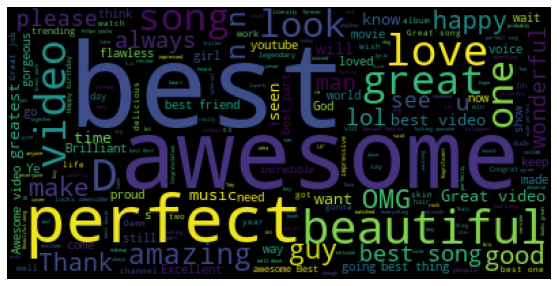

In [19]:
#fig for positive comments
wordcloud=WordCloud().generate(total_comments_p)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Performing Emoji's Analysis

In [20]:
#cheking for emoji's in comments
emojies=[]
for com in  ytcommnets['comment_text']:
    for char in com:
        if char in UNICODE_EMOJI_ENGLISH:
            emojies.append(char)
            

In [21]:
emojies[6:9]

['🏻', '❤', '😍']

In [22]:
#cheking top 10  used emojies
Counter(emojies).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [23]:
#making list of top 10 emojies
emojies_top_10=[Counter(emojies).most_common(10)[i][0] for i in range (10)]

In [24]:
emojies_top_10

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [25]:
freq_emojies_top_10=[Counter(emojies).most_common(10)[i][1] for i in range (10)]

In [26]:
freq_emojies_top_10

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [27]:
#tracing bar graph
trace=pgo.Bar(x=emojies_top_10,y=freq_emojies_top_10)
iplot([trace])

In [28]:
#path for csv files which contains also json
path=r"C:\Users\sandy4232\Desktop\Data analyst projects\Text Data Analysis (Youtube)\additional_data"

In [29]:
files=os.listdir(path)

In [30]:
#seprating json and importing only csv
csv_s=[files[csv] for csv in range(0,len(files),2)]

In [31]:
full_df=pd.DataFrame()
for file in csv_s:
    current_df=pd.read_csv(path+'/'+file,encoding='iso-8859-1',error_bad_lines=False)
    current_df['country']=file.split('.')[0][0:2]
    full_df=pd.concat([full_df,current_df])

C:\Users\sandy4232\AppData\Local\Temp\ipykernel_9936\254045183.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\sandy4232\AppData\Local\Temp\ipykernel_9936\254045183.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\sandy4232\AppData\Local\Temp\ipykernel_9936\254045183.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\sandy4232\AppData\Local\Temp\ipykernel_9936\254045183.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.



C:\Users\sandy4232\AppData\Local\Temp\ipykernel_9936\254045183.py:3: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a f

In [32]:
full_df.head(10)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   
5  0yIWz1XEeyc      17.14.11   
6  _uM5kFfkhB8      17.14.11   
7  2kyS6SvSYSE      17.14.11   
8  JzCsM1vtn78      17.14.11   
9  43sm-QwLcx4      17.14.11   

                                               title     channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©        EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail         iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...      Rudy Mancuso   
3                           I Dare You: GOING BALD!?          nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)        Ed Sheeran   
5  Jake Paul Says Alissa Violet CHEATED with LOGA...        DramaAlert   
6             Vanoss Superhero School - New Students      VanossGaming   
7                 WE WANT TO TALK ABOUT OUR MARRIAGE      CaseyNeistat   
8               THE LOGANG MADE HISTORY. LOL. AGAIN.  Logan Paul Vlogs   
9  Finally Sheldon is winning an argument about t...       Sheikh Musa   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   
5           25  2017-11-13T07:37:51.000Z   
6           23  2017-11-12T23:52:13.000Z   
7           22  2017-11-13T17:13:01.000Z   
8           24  2017-11-12T20:19:24.000Z   
9           22  2017-11-10T14:10:46.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
5  #DramaAlert|"Drama"|"Alert"|"DramaAlert"|"keem...   1309699   103755   
6  Funny Moments|"Montage video games"|"gaming"|"...   2987945   187464   
7                                    SHANtell martin    748374    57534   
8  logan paul vlog|"logan paul"|"logan"|"paul"|"o...   4477587   292837   
9               God|"Sheldon Cooper"|"Young Sheldon"    505161     4135   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   
5      4613          12143  https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg   
6      9850          26629  https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg   
7      2967          15959  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
8      4123          36391  https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg   
9       976           1484  https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   
5              False             False                   False   
6              False             False                   False   
7              False             False                   False   
8              False             False                   False   
9       

In [33]:
full_df.shape

(375942, 17)

# Analysing the most liked category

In [34]:
#checking for unique category id
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [35]:
#importing text file in which all categery are mentioned
cat=pd.read_csv('category_file.txt',sep=':')

In [36]:
cat.reset_index(inplace=True)

In [37]:
cat

index Category_id      Category_name
0       1               Film & Animation
1       2               Autos & Vehicles
2      10                          Music
3      15                 Pets & Animals
4      17                         Sports
5      18                   Short Movies
6      19                Travel & Events
7      20                         Gaming
8      21                  Videoblogging
9      22                 People & Blogs
10     23                         Comedy
11     24                  Entertainment
12     25                News & Politics
13     26                  Howto & Style
14     27                      Education
15     28           Science & Technology
16     29          Nonprofits & Activism
17     30                         Movies
18     31                Anime/Animation
19     32               Action/Adventure
20     33                       Classics
21     34                         Comedy
22     35                    Documentary
23     36                          Drama
24     37                         Family
25     38                        Foreign
26     39                         Horror
27     40                 Sci-Fi/Fantasy
28     41                       Thriller
29     42                         Shorts
30     43                          Shows
31     44           Trailers

In [38]:
cat.columns=['Category_id','Category_name']

In [39]:
cat.set_index('Category_id',inplace=True)

In [40]:
cat

Category_name
Category_id                        
1                  Film & Animation
2                  Autos & Vehicles
10                            Music
15                   Pets & Animals
17                           Sports
18                     Short Movies
19                  Travel & Events
20                           Gaming
21                    Videoblogging
22                   People & Blogs
23                           Comedy
24                    Entertainment
25                  News & Politics
26                    Howto & Style
27                        Education
28             Science & Technology
29            Nonprofits & Activism
30                           Movies
31                  Anime/Animation
32                 Action/Adventure
33                         Classics
34                           Comedy
35                      Documentary
36                            Drama
37                           Family
38                          Foreign
39                           Horror
40                   Sci-Fi/Fantasy
41                         Thriller
42                           Shorts
43                            Shows
44             Trailers

In [41]:
dct=cat.to_dict()

In [42]:
dct['Category_name']

{1: ' Film & Animation',
 2: ' Autos & Vehicles',
 10: ' Music',
 15: ' Pets & Animals',
 17: ' Sports',
 18: ' Short Movies',
 19: ' Travel & Events',
 20: ' Gaming',
 21: ' Videoblogging',
 22: ' People & Blogs',
 23: ' Comedy',
 24: ' Entertainment',
 25: ' News & Politics',
 26: ' Howto & Style',
 27: ' Education',
 28: ' Science & Technology',
 29: ' Nonprofits & Activism',
 30: ' Movies',
 31: ' Anime/Animation',
 32: ' Action/Adventure',
 33: ' Classics',
 34: ' Comedy',
 35: ' Documentary',
 36: ' Drama',
 37: ' Family',
 38: ' Foreign',
 39: ' Horror',
 40: ' Sci-Fi/Fantasy',
 41: ' Thriller',
 42: ' Shorts',
 43: ' Shows',
 44: ' Trailers            '}

In [43]:
full_df['Category_name']=full_df['category_id'].map(dct['Category_name'])

In [44]:
full_df

video_id trending_date  \
0      n1WpP7iowLc      17.14.11   
1      0dBIkQ4Mz1M      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      d380meD0W0M      17.14.11   
4      2Vv-BfVoq4g      17.14.11   
...            ...           ...   
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0            Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1                          PLUSH - Bad Unboxing Fan Mail   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                               I Dare You: GOING BALD!?   
4            Ed Sheeran - Perfect (Official Music Video)   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of DutyÂ®: Black Ops 4 âÂ Mult...   

                  channel_title  category_id              publish_time  \
0                    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1                     iDubbbzTV           23  2017-11-13T17:00:00.000Z   
2                  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3                      nigahiga           24  2017-11-12T18:01:41.000Z   
4                    Ed Sheeran           10  2017-11-09T11:04:14.000Z   
...                         ...          ...                       ...   
40944             AaronsAnimals           15  2018-05-18T13:00:04.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views    likes  \
0      Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1      plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4      edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
...                                                  ...       ...      ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609    38160   
40945                                             [none]   1064798    60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451    48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813   192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119   357079   

       dislikes  comment_count  \
0         43420         125882   
1          1688          13030   
2          5339           8181   
3          1989          17518   
4         21082          85067   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg              False   
1      https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
4      https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg              False   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg              False   
4

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

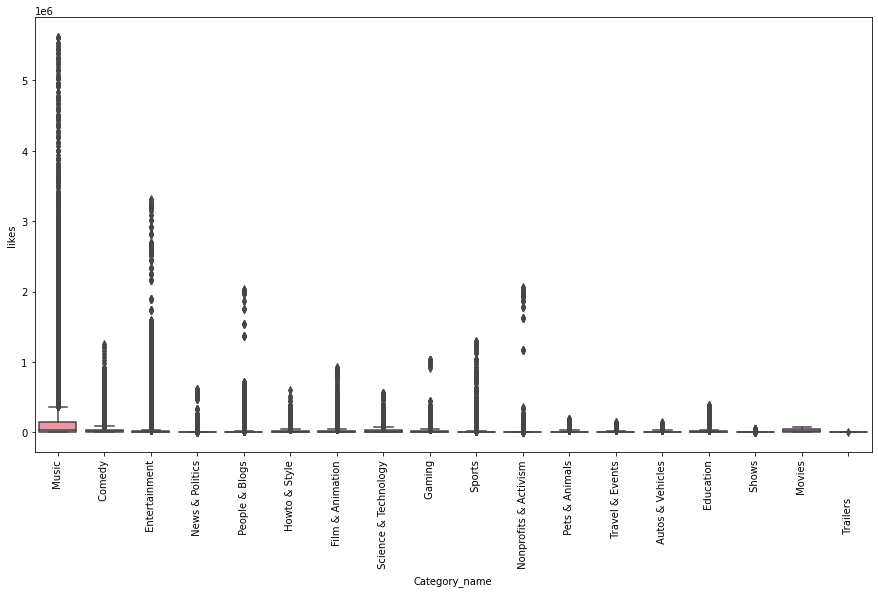

In [45]:
#placing graph for likes and category
plt.figure(figsize=(15,8))
sns.boxplot(x='Category_name',y='likes',data=full_df)
plt.xticks(rotation='90')

# Analyseing  whether audience is engaged or not !

In [46]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'Category_name'],
      dtype='object')

In [47]:
#creating like-dislike-comment rate
full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate']=(full_df['dislikes']/full_df['views'])*100
full_df['comment_rate']=(full_df['comment_count']/full_df['views'])*100

In [48]:
full_df

video_id trending_date  \
0      n1WpP7iowLc      17.14.11   
1      0dBIkQ4Mz1M      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      d380meD0W0M      17.14.11   
4      2Vv-BfVoq4g      17.14.11   
...            ...           ...   
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0            Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1                          PLUSH - Bad Unboxing Fan Mail   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                               I Dare You: GOING BALD!?   
4            Ed Sheeran - Perfect (Official Music Video)   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of DutyÂ®: Black Ops 4 âÂ Mult...   

                  channel_title  category_id              publish_time  \
0                    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1                     iDubbbzTV           23  2017-11-13T17:00:00.000Z   
2                  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3                      nigahiga           24  2017-11-12T18:01:41.000Z   
4                    Ed Sheeran           10  2017-11-09T11:04:14.000Z   
...                         ...          ...                       ...   
40944             AaronsAnimals           15  2018-05-18T13:00:04.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views    likes  \
0      Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1      plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4      edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
...                                                  ...       ...      ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609    38160   
40945                                             [none]   1064798    60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451    48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813   192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119   357079   

       dislikes  ...                                  thumbnail_link  \
0         43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1          1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2          5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3          1989  ...  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4         21082  ...  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   
...         ...  ...                                             ...   
40944      1385  ...  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg   
40945       382  ...  https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg   
40946      1032  ...  https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg   
40947      2846  ...  https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg   
40948    212976  ...  https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg   

      comments_disabled  ratings_disabled  video_error_or_removed  \
0                 False             False                   False   
1              

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

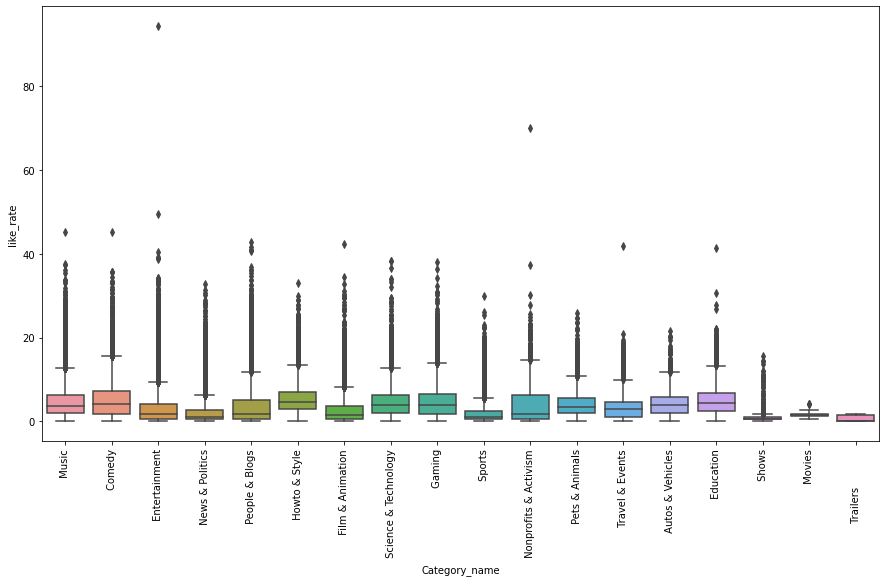

In [49]:
#placing graph for likes_ratio and Category_name
plt.figure(figsize=(15,8))
sns.boxplot(x='Category_name',y='like_rate',data=full_df)
plt.xticks(rotation='90')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

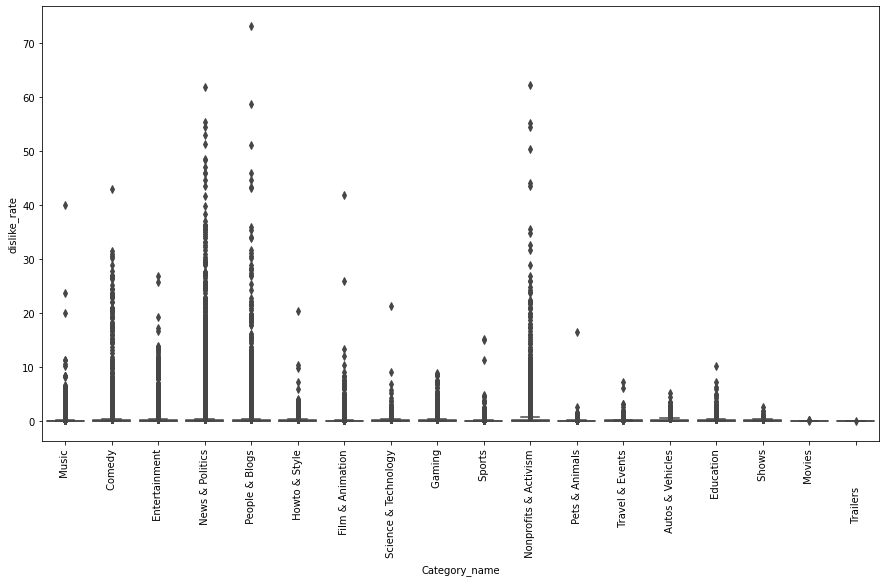

In [50]:
#placing graph for dislikes_ratio and Category_name
plt.figure(figsize=(15,8))
sns.boxplot(x='Category_name',y='dislike_rate',data=full_df)
plt.xticks(rotation='90')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, ' Music'),
  Text(1, 0, ' Comedy'),
  Text(2, 0, ' Entertainment'),
  Text(3, 0, ' News & Politics'),
  Text(4, 0, ' People & Blogs'),
  Text(5, 0, ' Howto & Style'),
  Text(6, 0, ' Film & Animation'),
  Text(7, 0, ' Science & Technology'),
  Text(8, 0, ' Gaming'),
  Text(9, 0, ' Sports'),
  Text(10, 0, ' Nonprofits & Activism'),
  Text(11, 0, ' Pets & Animals'),
  Text(12, 0, ' Travel & Events'),
  Text(13, 0, ' Autos & Vehicles'),
  Text(14, 0, ' Education'),
  Text(15, 0, ' Shows'),
  Text(16, 0, ' Movies'),
  Text(17, 0, ' Trailers            ')])

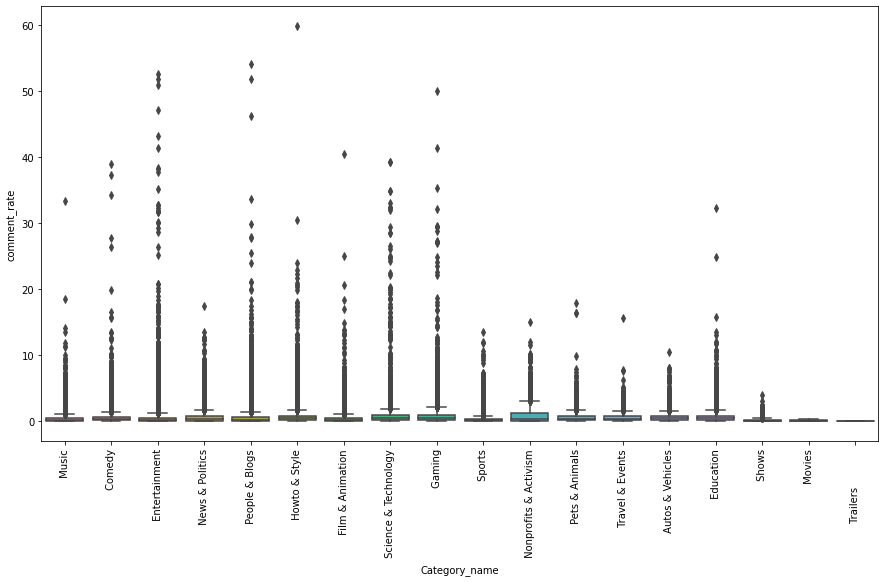

In [51]:
#placing graph for comment_rate and Category_name
plt.figure(figsize=(15,8))
sns.boxplot(x='Category_name',y='comment_rate',data=full_df)
plt.xticks(rotation='90')

<AxesSubplot:xlabel='views', ylabel='likes'>

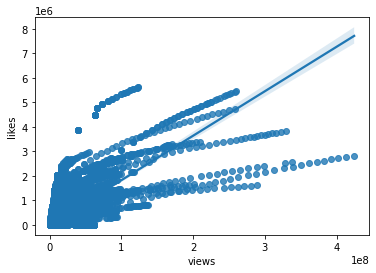

In [52]:
#ploting regplot graph for data
sns.regplot(data=full_df,x='views',y='likes')

In [53]:
full_df[['views','likes','dislikes']].corr()

views     likes  dislikes
views     1.000000  0.777796  0.421653
likes     0.777796  1.000000  0.453710
dislikes  0.421653  0.453710  1.000000

<AxesSubplot:>

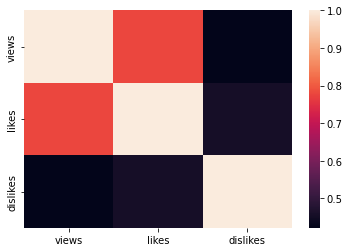

In [54]:
sns.heatmap(full_df[['views','likes','dislikes']].corr())

# Analyzing trending videos

In [55]:
cdf=full_df.groupby('channel_title')['video_id'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'video_id':'total videos'})
cdf

channel_title  total videos
0      The Late Show with Stephen Colbert           984
1                                     WWE           804
2             Late Night with Seth Meyers           773
3                               VikatanTV           763
4                            TheEllenShow           743
...                                   ...           ...
37819                   LIGHTS - 001 jrny             1
37820                          bangtanist             1
37821                      LIGAMX Femenil             1
37822             LIGA COLOMBIANA OFICIAL             1
37823                    Pavel Sidorik TV             1

[37824 rows x 2 columns]

In [63]:
px.bar(data_frame=cdf[0:20],x='channel_title',y='total videos')

# checking Does Punctuations in tital and tags have an impact on views, likes, dislikes

In [57]:
#function for count punctuation
def punc_count(x):
    return len([c for c in x if c in string.punctuation])

In [58]:
 full_df['title'][0]

0          Eminem - Walk On Water (Audio) ft. BeyoncÃ©
0    Sing zu Ende! | Gesangseinlagen vom Feinsten |...
0             Malika LePen : Femme de Gauche - Trailer
0        John Lewis Christmas Ad 2017 - #MozTheMonster
0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
0    é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...
0             ì¢ì by ë¯¼ì_ì¤ì¢
ì _ì¢ë ëµê°
0                       CapÃ­tulo 12 | MasterChef 2017
0    ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...
0                   WE WANT TO TALK ABOUT OUR MARRIAGE
Name: title, dtype: object

In [59]:
#adding punctuation column in dataframe
full_df['count_punc']=full_df['title'].apply(punc_count)

In [60]:
full_df[0:2]

video_id trending_date                                        title  \
0  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. BeyoncÃ©   
1  0dBIkQ4Mz1M      17.14.11                PLUSH - Bad Unboxing Fan Mail   

  channel_title  category_id              publish_time  \
0    EminemVEVO           10  2017-11-10T17:00:03.000Z   
1     iDubbbzTV           23  2017-11-13T17:00:00.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   

   dislikes  ...  comments_disabled ratings_disabled  video_error_or_removed  \
0     43420  ...              False            False                   False   
1      1688  ...              False            False                   False   

                                         description  country Category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...       CA         Music   
1  STill got a lot of packages. Probably will las...       CA        Comedy   

   like_rate dislike_rate  comment_rate  count_punc  
0   4.589104     0.253051      0.733639           4  
1  12.594873     0.166363      1.284185           1  

[2 rows x 22 columns]

<AxesSubplot:xlabel='count_punc', ylabel='views'>

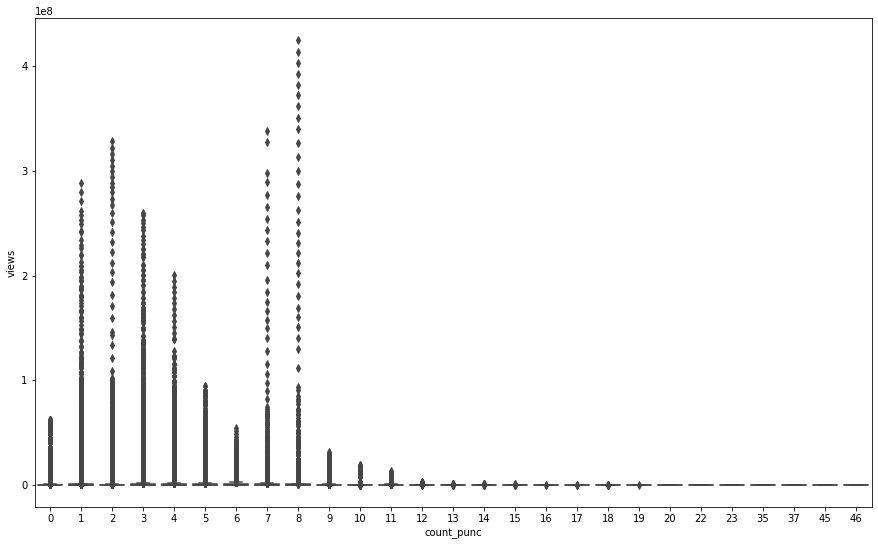

In [61]:
plt.figure(figsize=(15,9))
sns.boxplot(x='count_punc',y='views',data=full_df)

In [62]:
full_df['count_punc'].corr(full_df['views'])

0.04626223696213477